In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from fbprophet.diagnostics import cross_validation, performance_metrics
from sklearn.preprocessing import MinMaxScaler

In [5]:
df_temp = pd.read_csv("temperature_data_cleaned_and_prepped.csv")
df_reservoir = pd.read_csv("reservoir_data/san-antonio_reservoir_data.csv")

In [13]:
df_temp["date"] = pd.to_datetime(df_temp['date'])
# df_temp.drop(columns =['Unnamed: 0'], inplace=True)
df_temp = df_temp.set_index('date')

In [26]:
df_reservoir['date'] = pd.to_datetime(df_reservoir['date'])
df_reservoir.drop(columns =['conservation_storage','percent_full','conservation_capacity'], inplace=True)
df_reservoir = df_reservoir.set_index('date')

In [30]:
mmscaler = MinMaxScaler(feature_range=(0, 1))
mmscaler.fit(df_reservoir[['reservoir_storage']])
df_reservoir.reservoir_storage = mmscaler.transform(df_reservoir[['reservoir_storage']])

In [65]:
reservoir_agg = df_reservoir.reservoir_storage.resample('M').agg('mean')['2010':'2015']

In [66]:
mmscaler = MinMaxScaler(feature_range=(0, 1))
mmscaler.fit(df_temp[['avg_temp']])
df_temp.avg_temp = mmscaler.transform(df_temp[['avg_temp']])

In [67]:
temp_agg = df_temp.avg_temp.resample('M').agg('mean')['2010':'2015']

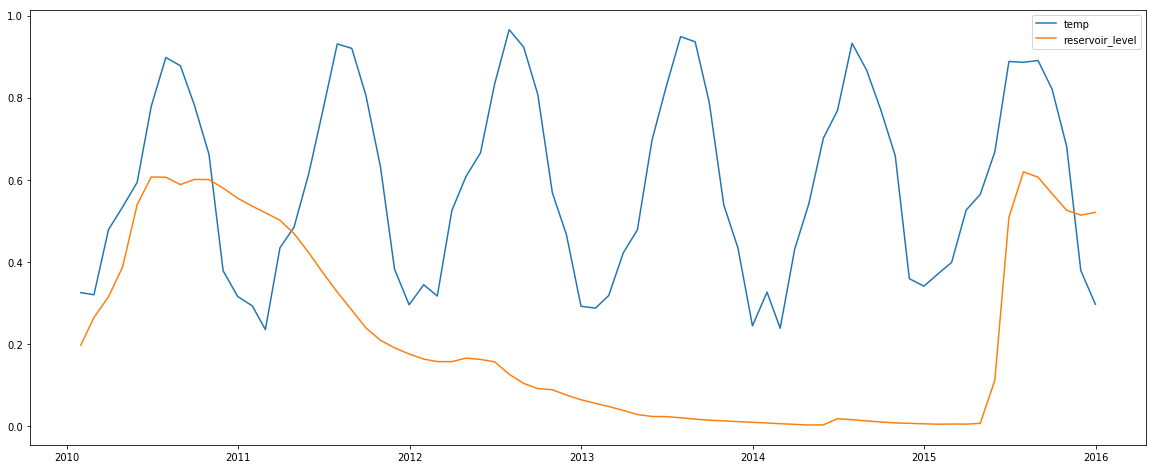

In [68]:
plt.figure(figsize=(20, 8))
plt.plot(temp_agg, label='temp')
plt.plot(reservoir_agg, label='reservoir_level')
plt.legend()